<div class="alert alert-success"><div class='alert btn-success'>
Дмитрий, критичных ошибок нет. Молодец!)<br> 
Проект принят!<br> 

</div></div>

Очень рекомендую посмотреть видео от Глеба Михайлова!)<br>
**[Линейная Регрессия для Дата Саентиста](https://www.youtube.com/watch?v=QZJ94igWVxQ&t=19s)**     <br> 
    
**[Вот здесь есть отличное объяснение с примером по мультиколлинеарности.](https://habr.com/ru/company/akbarsdigital/blog/592493/)** <br>
    
**[И здесь интересная статься - коротко о мультиколлинеарности и что с этим делать.](https://medium.com/analytics-vidhya/removing-multi-collinearity-for-linear-and-logistic-regression-f1fa744f3666)** <br>   
   
**[Если интересна статистика, можно посмотреть короткие видео-лекции Карпова на степике](https://stepik.org/lesson/8095/step/1?unit=1371)**    <br>


<br>
<div class="alert alert-success"><div class='alert btn-success'>    
Надеюсь, ты найдешь для себя что-то интересное и полезное😊  <br>
Желаю тебе удачи в дальнейшей учебе! 😉 </div></div>

Дмитрий, привет! Меня зовут Ирина Литвинова. Сегодня я проверю твой проект.<br>
<br> Ты можешь обращаться ко мне на "ты"😏 Надеюсь, ты не будешь против, если и я буду обращаться к тебе на "ты". Но если для тебя это неприемлeмо, дай знать, пожалуйста) <br>
<br> Мне очень важна твоя реакция на мои комментарии, особенно <font color='red'>красные</font>. Можешь реагировать, например, так ('исправлено', ...)<br>
<br> Ты можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. <br>
Это нужно, чтобы не создавалась путаница😉<br>
Например, так:<br>
    
<div class="alert alert-block alert-info"><b>Комментарий студента</b>
    
<b>Изменения:</b> Были внесены следующие изменения ...<br></div> 


<br> Пожалуйста, не удаляй мои комментарии, так как они повышают качество повторного ревью и делают его быстрее)<br>
<br> Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓<br>

Для твоего удобства мои комментарии будут в <font color='green'>зеленой</font>, <font color='orange'>желтой</font> или <font color='red'>красной</font> рамках:<br>
<br>

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<b>Ошибка:</b><br>
Если требуются исправления. Работа не может быть принята с красными комментариями.<br></div>

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
Если можно немного улучшить.<br></div>

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
Если все сделано отлично.<br></div>  

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
👍 Есть введение в проект. Отлично!<br>

</div> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from tqdm import tqdm

RANDOM = 12345
state = RandomState(RANDOM) 

In [2]:
BUDGET = 10e9 # Бюджет на разработку 200 скважин в регионе
TOTAL_POINTS = 500 # При разведке региона исследуют 500 точек
SELECTED_POINTS = 200 # с помощью машинного обучения выбирают 200 точек лучших для разработки
BUDGET_POINTS_RUB = BUDGET / SELECTED_POINTS
BARREL_RUB = 450 # доход с каждого барреля
PRODUCT_UNITS_INCOME_RUB = 450 * 10**3 # доход с единицы продукта
THRESHOLD_PERSENT = 2.5 # порог вероятности убытков

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Здорово, что импортируешь необходимые библиотеки в первой ячейке. Так сразу понятно какие используются библиотеки и можно легко настроить свое окружение при необходимости. 
</div> 

## Загрузка и подготовка данных

In [3]:
df_0 = pd.read_csv("/datasets/geo_data_0.csv")
df_1 = pd.read_csv("/datasets/geo_data_1.csv")
df_2 = pd.read_csv("/datasets/geo_data_2.csv")

In [4]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Первичное изучение данных

In [7]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Имена столбцов корректные и типы данных соответствующие во всех фреймах

### Количество дубликатов

In [10]:
df_0.duplicated().sum()

0

In [11]:
df_1.duplicated().sum()

0

In [12]:
df_2.duplicated().sum()

0

Дубликаты отсутствуют

### Описание и визуализация данных

In [13]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [14]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [15]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Отрицательные значения в запасах сырья отсутствуют

Функция для отображения boxplot указанного датафрейма

In [16]:
def visible_frame(fr_label,fr):
    """
    Функция для отображения boxplot указанного датафрейма
    Input: Подпись, имя датафрейма 
    """
    fig,ax = plt.subplots(1,4,figsize = (20,5))
    col = fr.columns
    i = 0
    for c in col[1:]:
        ax[i].boxplot(data = fr,x = c);
        ax[i].set_title(c)
        ax[i].set_ylabel(fr_label)
        i = i + 1

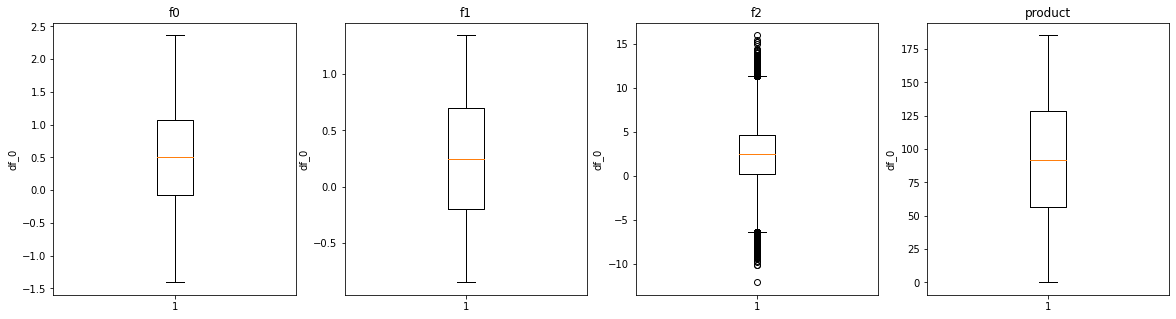

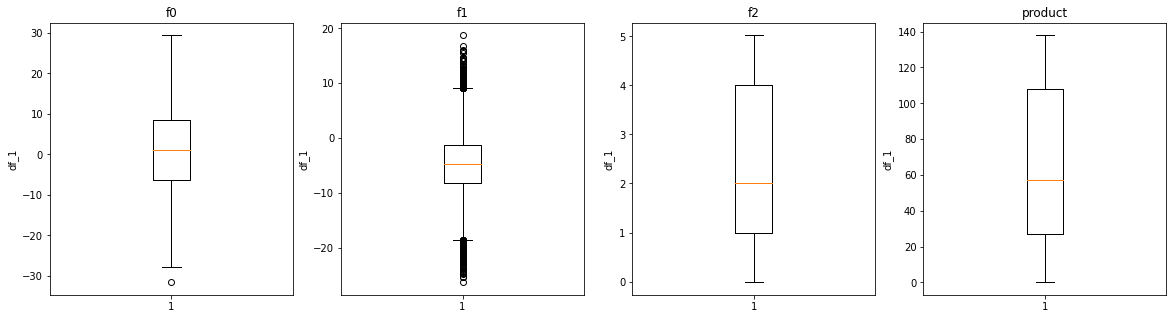

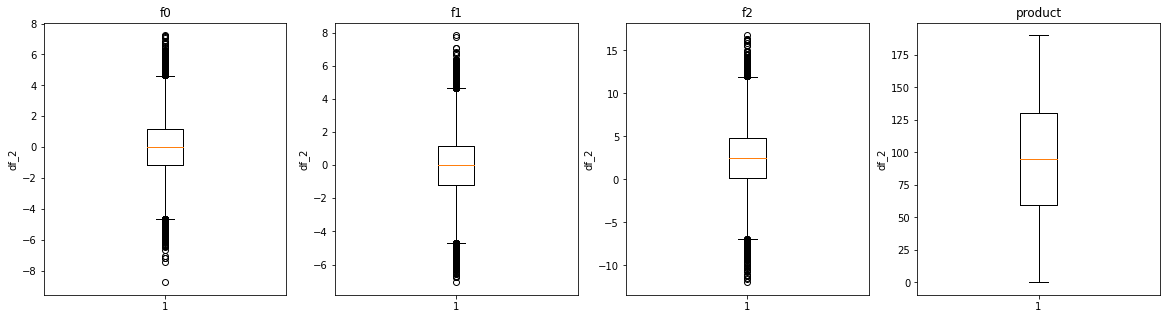

In [17]:
visible_frame('df_0',df_0)
visible_frame('df_1',df_1)
visible_frame('df_2',df_2)

В столбцах с данными присутствуют выбросы. Удалять не будем в связи  тем, что данные значения могут привести к удалению значений целевого признака с высоким показателем запасов полезных ископаемых

### Проверка мультиколлинеарности

Для обнаружения мультиколлинеарности факторов можно проанализируем непосредственно корреляционную матрицу факторов. Значения по модулю больше 0,7-0,8 коэффициентов парной корреляции свидетельствует о возможных проблемах с качеством получаемых оценок. 

Удаление столбца **id**

In [18]:
df_0 = df_0.drop(['id'],axis=1)
df_1 = df_1.drop(['id'],axis=1)
df_2 = df_2.drop(['id'],axis=1)

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 `id`  - уникальный идентификатор скважины, он не является признаком, поэтому его действительно лучше удалить. 
</div> 

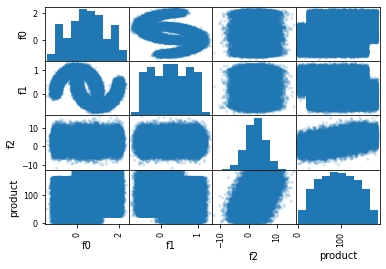

In [19]:
pd.plotting.scatter_matrix(df_0, alpha=0.2);

In [20]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


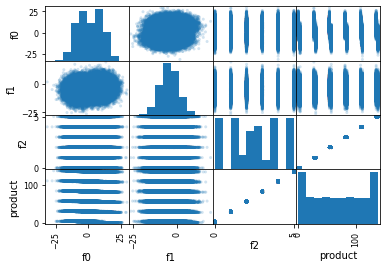

In [21]:
pd.plotting.scatter_matrix(df_1, alpha=0.2);

In [22]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


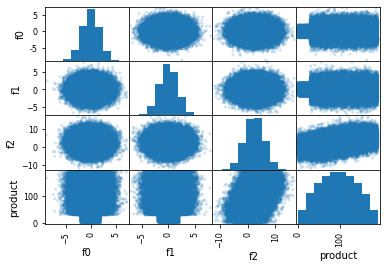

In [23]:
pd.plotting.scatter_matrix(df_2, alpha=0.2);

In [24]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


<AxesSubplot:>

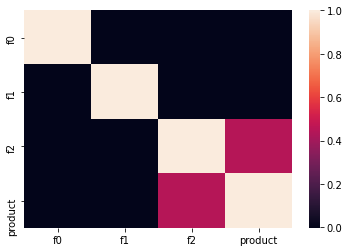

In [25]:
sns.heatmap(df_2.corr())

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>

Для удобной визуализации можно использовать - ["Тепловая карта корреляции".](https://www.delftstack.com/ru/howto/seaborn/correlation-heatplot-seaborn-python/) <br>
</div>

В датафрейме df_1 имеется сильная корреляция между **f2** и **product**. В связи с этим столбец f2 в этом датафрейме подлежит удалению

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
  
<b>Изменения:</b> Были внесены следующие изменения <br> 
   <del>В датафрейме df_1 имеется сильная корреляция между **f2** и **product**. В связи с этим столбец f2 в этом датафрейме подлежит удалению</del>
    <del>#df_1 = df_1.drop(['f2'],axis=1)</del><br>
    
    Сильной корреляции между признаками не выявлено
</div>

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<s> <b>Ошибка:</b><br>
Мультиколлинеарность — явление, при котором наблюдается сильная корреляция между **признаками**, что может негативно отразиться на модели.  А здесь признак `f2` коррелирует с целевой переменной `product`, а не с другим признаком, этот факт как раз в пользу более точных предсказаний:) Поэтому `f2` удалять не надо)  </s>
</div>

Вывод:<br> 
При изучении не было выявлено пропусков и дубликатов.<br> 
Признак **id** был удален из всех датафреймов (является лишним при обучении)<br>
Сильной корреляции между признаками не выявлено

## Обучение и проверка модели

Метод обучения модели и прогнозирования

In [26]:
def line_model(fr):
    # задание целевого признак и подготовим данные
    features = fr.drop(['product'], axis=1)
    target = fr['product']
    
    # Разбиение данных на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train,target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=RANDOM)
    
    #обучение модели
    model = LinearRegression()
    # обучение модели
    model.fit(features_train, target_train)
    # прогрнозирование
    predicted_valid = model.predict(features_valid)
    
    #rmse
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    
    # посчитаем средний запас сырья
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid)
    
    return target_valid, predicted_valid, rmse, predicted_valid_mean

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 
* Отлично, что используешь функцию для повторяющихся действий    
* Данные разделены на обучающую и валидационную выборку корректно - 75:25. Будет надежнее, если после разбиения проверять доли)

    
</div> 

Расчет основных показателей для каждого региона

In [27]:
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = line_model(df_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = line_model(df_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = line_model(df_2)

In [28]:
print(f'Регион_0. Средний запас сырья: {predicted_valid_mean_0:.2f} rmse: {rmse_0}')
print(f'Регион_1. Средний запас сырья: {predicted_valid_mean_1:.2f} rmse: {rmse_1}')
print(f'Регион_2. Средний запас сырья: {predicted_valid_mean_2:.2f} rmse: {rmse_2}')

Регион_0. Средний запас сырья: 92.59 rmse: 37.5794217150813
Регион_1. Средний запас сырья: 68.73 rmse: 0.893099286775617
Регион_2. Средний запас сырья: 94.97 rmse: 40.02970873393434


Вывод:<br>
Высокие средние значения предсказанных запасов в регионах 0 и 2, но в них и высокий показатель средней ошибки.<br>
Низкий средний предсказанный запас, имеющий самое высокое значение rmse в регионе номер 1. Возможно, удаленный признак f2 имеет особое значение.<br>

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера</b>
    
<b>Совет:</b><br>
После отмены удаления `f2` вывод лучше скорректировать, т.к. результаты изменятся. В выводе можно выделить регион с минимальной ошибкой.
 
</div>

## Подготовка к расчёту прибыли

In [29]:
BUDGET = 10*10**9 # Бюджет на разработку 200 скважин в регионе
TOTAL_POINTS = 500 # При разведке региона исследуют 500 точек
SELECTED_POINTS = 200 # с помощью машинного обучения выбирают 200 точек лучших для разработки
BUDGET_POINTS_RUB = BUDGET / SELECTED_POINTS
BARREL_RUB = 450 # доход с каждого барреля
PRODUCT_UNITS_INCOME_RUB = 450 * 10**3 # доход с единицы продукта
THRESHOLD_PERSENT = 2.5 # порог вероятности убытков

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Константы оформлены согласно стилю [PEP-8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29). Только объявлять константы лучше в начале проекта после импортов, затем загрузка данных. Так проще будет их найти и изменить, если возникнет такая необходимость.<br>
* Для записи больших чисел можно использовать экспоненциальную запись числа - `10e9`, что означает 10 * 10**9.        

</div>

**Объём сырья для безубыточной разработки новой скважины**

In [30]:
vol_extraction = BUDGET / SELECTED_POINTS / BARREL_RUB
print(f'Объём сырья для безубыточной разработки новой скважины равен {int(vol_extraction)} баррелей')

Объём сырья для безубыточной разработки новой скважины равен 111111 баррелей


In [31]:
vol_extraction_up = round(vol_extraction/1000, 3)

In [32]:
print(f'{vol_extraction_up} (тыс. баррелей)')

111.111 (тыс. баррелей)


<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Достаточный объём сырья для безубыточной разработки новой скважины рассчитан верно.
</div>


Разница между предсказанным средним запасом в регионе и объемом безубыточности

In [33]:
predicted_valid_mean_0 - vol_extraction_up

-18.518432215619654

In [34]:
predicted_valid_mean_1 - vol_extraction_up

-42.382453104554

In [35]:
predicted_valid_mean_2 - vol_extraction_up

-16.145954031995117

Доля скважин в регионе, разработка которых выше точки безубыточности (на основе исходных данных)

In [36]:
df_0.loc[df_0['product']>vol_extraction_up,'f0'].count()/df_0.shape[0]

0.36583

In [37]:
df_1.loc[df_1['product']>vol_extraction_up,'f0'].count()/df_1.shape[0]

0.16537

In [38]:
df_2.loc[df_2['product']>vol_extraction_up,'f0'].count()/df_2.shape[0]

0.38178

Вывод:<br>
Минимальное количество баррелей нефти для безубыточной разработки составило 111.111
Предсказанные средние значения во всех регионах меньше, чем объем добычи, необходимый для безубыточной добычи,  максимальное средний объем в регионах равен 94<br>
В свою очередь, на основе исходных данных видно, что имеется достаточное количество скважин, с большим количеством запасов.

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b><br>
    
Верно. В каждом регионе средний объем сырья меньше достаточного объёма для безубыточности. Есть 25 000 точек, из которых надо выбрать 200. В результате, среди этих скважин могут быть скважины с достаточным и недостаточным запасом сырья. <br>
    
**При выборе скважин опираемся на предсказания, поэтому точность прогноза имеет большое значение** и без модели нам не обойтись.<br>     
    
Имеено техника "Bootstrap" опираясь на предсказания позволяет оценить риск убытков при случайным отборе 500 точек. 1000 раз отбирая случайным образом точки, считаем какой % случаев принесет убытки. 
    
   
</div>

## Расчёт прибыли и рисков 

### Приведение к одному типу

Для использования в дальнейших расчетах необходимо целевые признаки и предсказанные привести к одному типу

In [39]:
type(target_valid_0)

pandas.core.series.Series

In [40]:
type(predicted_valid_0)

numpy.ndarray

In [41]:
# метод для приведения к типу Series
def bring_series(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

In [42]:
tar0 , pred0 = bring_series(target_valid_0, predicted_valid_0)

Проверка

In [43]:
tar0.head()

0     10.038645
1    114.551489
2    132.603635
3    169.072125
4    122.325180
Name: product, dtype: float64

In [44]:
pred0.head()

0    95.894952
1    77.572583
2    77.892640
3    90.175134
4    70.510088
dtype: float64

In [45]:
tar1 , pred1 = bring_series(target_valid_1, predicted_valid_1)

In [46]:
tar2 , pred2 = bring_series(target_valid_2, predicted_valid_2)

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Очень хорошо, что не забываешь про индексы, теперь таргет соответствует предсказаниям.
</div>

### Bootstrap

Метод расчёта прибыли (с 200 лучших скважин)

In [47]:
def total_income(target, prob, count, income_rub, budget):
    prob_sort = prob.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int(income_rub * selected.sum() - budget)

<div class="alert alert-block alert-success"><b>Комментарий ревьюера </b>
    
<b>Успех:</b><br>
👍 Функция прибыли в порядке.
</div>

Расчёт параметров Bootstap

In [48]:
def calculate_regions(target, predicted, sel_points, income_rub, budget):
    """
    Метод для расчета параметров прибыли с помощью Bootstrap
    """
   
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = TOTAL_POINTS, replace=True, random_state=state)
        pred_subsumple = predicted[target_subsample.index]
        values.append(total_income(target_subsample, pred_subsumple, sel_points, income_rub, budget))
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = (len(values[values < 0]) / len(values) * 100)
    return values_mean, lower, upper, risk

<div class="alert alert-block alert-success"><b>Комментарий ревьюера</b>
    
<b>Успех:</b><br>
    👍 Отлично, что при семплировании данных устанавливаешь `replace = True`, это необходимо чтобы наблюдение в выборку попало несколько раз, что позволяет добиться независимости при каждом выборе, иначе вероятность достать элемент из выборки будет с каждым разом увеличиваться. Чем больше размер подвыборки, тем выраженнее будет зависимость, поэтому без возврата не удастся получить разнообразные варианты, а подвыборку бОльшего размера вообще не получить.

Почему именно так. Вспомним, что выборка - это некоторое представление о генеральной совокупности, ее часть. Значит, что где-то в регионе существуют и другие потенциальные точки добычи нефти, о которых мы можем не знать, но они являются частью этой генеральной совокупности. В этом случае повторяющиеся наблюдения можно считать разными точками добычи из всей генеральной совокупности с близкими характеристиками.
    
</div>  

**Расчет параметров прибыли для регионов**

Сбор всех расчетных параметров в словарь

In [49]:
dict_reg = {}
dict_reg['reg0']={}
dict_reg['reg1']={}
dict_reg['reg2']={}

<div class="alert alert-block alert-info"><b>Комментарий студента</b>
  
<b>Изменения:</b> Были внесены следующие изменения <br> 
    tar0, pred0 ->  tar1, pred1, tar2,pred2 
</div>

In [50]:
dict_reg['reg0']['profit'], dict_reg['reg0']['lower'], dict_reg['reg0']['upper'], dict_reg['reg0']['risk'] = \
calculate_regions(tar0, pred0, SELECTED_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET)
dict_reg['reg1']['profit'], dict_reg['reg1']['lower'], dict_reg['reg1']['upper'], dict_reg['reg1']['risk'] = \
calculate_regions(tar1, pred1, SELECTED_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET)
dict_reg['reg2']['profit'], dict_reg['reg2']['lower'], dict_reg['reg2']['upper'], dict_reg['reg2']['risk']  = \
calculate_regions(tar2, pred2, SELECTED_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET)

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<s> <b>Ошибка:</b><br>
Обрати, пожалуйста, внимание на опечатку.<br>
    Для каждого региона в `calculate_regions` используешь `tar0, pred0`   </s>
    
    
</div>  

In [51]:
dict_reg

{'reg0': {'profit': 425938526,
  'lower': -102090093,
  'upper': 947976352,
  'risk': 6.0},
 'reg1': {'profit': 518259493,
  'lower': 128123231,
  'upper': 953612981,
  'risk': 0.3},
 'reg2': {'profit': 420194004,
  'lower': -115852608,
  'upper': 989629939,
  'risk': 6.2}}

In [52]:
df_final = pd.DataFrame.from_dict(dict_reg, orient='index')

In [53]:
print(df_final.sort_values(by='profit',ascending=False))

         profit      lower      upper  risk
reg1  518259493  128123231  953612981   0.3
reg0  425938526 -102090093  947976352   6.0
reg2  420194004 -115852608  989629939   6.2


Вывод:<br>
В рамках исследования проведена загрузка и подготовка данных, обучена модель линейной регрессии, и подготовлен прогноз запасов для скважин трёх регионов.

Регион_0. Средний запас сырья: 92.59 rmse: 37.5794217150813<br>
Регион_1. Средний запас сырья: 68.73 rmse: 0.893099286775617<br>
Регион_2. Средний запас сырья: 94.97 rmse: 40.02970873393434<br>


Достаточный объём сырья для безубыточной разработки новой скважины равен 111111 барреля или 111.111 единицы продукта (тыс. баррелей)

В регионах средний запас сырья значения безубыточной разработки достаточного объёма сырья на 18.5, 42.5, 16.1 тыс. баррелей соответственно.<br>
Применили технику Bootstrap с 1000 выборок, для нахождения распределение прибыли

Средняя прибыль лучших месторождений региона 0 равна 425938526 руб.

Средняя прибыль лучших месторождений региона 1 равна 518259493 руб.

Средняя прибыль лучших месторождений региона 2 равна 420194004 362 руб.

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_0: -102090093   947976352

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_1: 128123231  953612981

95% доверительный интервал для средней прибыли 200 лучших месторождений региона_2:  -115852608  9896299399

Риск убытков региона 0 равен 6 %

Риск убытков региона_1 равен **0.3%**

Риск убытков региона_2 равен 6.2 %

**По всем показателям лидирует регион 1. Он же проходит порог в 2,5% риска убыточности**<br>

**Регион 1 рекомендован к освоению** <br>

<div class="alert alert-block alert-success"><b>Комментарий ревьюера V-2</b>
    
<b>Успех:</b><br>
    👍 Регион `geo_data_1` выбран абсолютно верно. В этом регионе минимальный % риска, т.к. модель предсказывает хорошо (ошибка минимальная). А при выборе 200 лучших скважин мы опираемся на предсказания, поэтому ничего удивительного  -  регион победил!)
    
</div>  

<div class="alert alert-block alert-danger"><b>Комментарий ревьюера</b>
    
<s> <b>Ошибка:</b><br>
    Скорректируй, пожалуйста, итоговый вывод после перерасчетов))  </s>
    
    
</div>  

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>Общий вывод по проекту</u></b>
<font color='green'><br> 


Дмитрий, приложено много усилий, ты - молодец! Есть несколько важных моментов, которые я отметила и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях. 

**Что мне особенно понравилось в твоей работе:**:
 
* Хорошее знакомство с данными.
* Рассчитан средний запас предсказанного сырья и размер ошибки для каждого региона.
* Рассчитан достаточный объём сырья для безубыточной разработки новой скважины.    
* Написана функция для расчёта прибыли.
* Использованы функции для повторяющихся действий.    
* Рассчитаны риски, прибыль и доверительный интервал для каждого региона.   
* Есть выводы в каждом блоке.    
* Код логичный и понятный. 
* Проект полностью соответствует плану!<br>


**На что стоит обратить внимание**:
    
* Осталось совсем немного поправить, а именно: не удалять `f2`, исправить опечатку в `calculate_regions`, скорректировать выводы. Подсказки ты найдешь в моих комментариях.




**Доработка займет у тебя совсем немного времени) Желаю удачи и жду твой проект на повторное ревью!**😉 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован